# Forecasting Lake Mead Water Levels Using ARIMA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


# Load CVS
df = pd.read_csv('CombinedData - CombinedData.csv')

# Convert 'datetime' to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])



# First few rows display
df.head()

,datetime,storage (acre-feet),release volume (acre-feet),pool elevation (feet),total release (cfs),Powell total release (cfs),Powell release volume (acre-feet),T_max (degrees f),T_min(degrees f),precipitation (inches),snow (inches),snow depth (inches)
0,1934-04-01,NaN,11662.8099,NaN,5880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1934-04-02,NaN,12039.6694,NaN,6070.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1934-04-03,NaN,11583.4711,NaN,5840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1934-04-04,NaN,11285.9504,NaN,5690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1934-04-05,NaN,10988.4298,NaN,5540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:


start_date = pd.to_datetime('1970-01-01')
end_date = pd.to_datetime('2025-02-28')

df_filtered = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

df_corrected = df_filtered.fillna(0)

In [4]:
df_corrected.head()

,datetime,storage (acre-feet),release volume (acre-feet),pool elevation (feet),total release (cfs),Powell total release (cfs),Powell release volume (acre-feet),T_max (degrees f),T_min(degrees f),precipitation (inches),snow (inches),snow depth (inches)
13059,1970-01-01,16777000.0,10308.0992,1152.65002,5197.0,9960.0,19755.3719,49.0,23.0,0.0,0.0,0.0
13060,1970-01-02,16789000.0,14552.7273,1152.76001,7337.0,14300.0,28363.6364,45.0,18.0,0.0,0.0,0.0
13061,1970-01-03,16801000.0,12444.2975,1152.87000,6274.0,16100.0,31933.8843,44.0,14.0,0.0,0.0,0.0
13062,1970-01-04,16814000.0,10089.9174,1152.97998,5087.0,10700.0,21223.1405,44.0,14.0,0.0,0.0,0.0
13063,1970-01-05,16824000.0,17512.0661,1153.06995,8829.0,14500.0,28760.3306,44.0,21.0,0.0,0.0,0.0


In [21]:
# Set datetime as index
df_corrected.set_index('datetime', inplace=True)

df_corrected = df_corrected.asfreq('datetime')

KeyError: "None of ['datetime'] are in the columns"

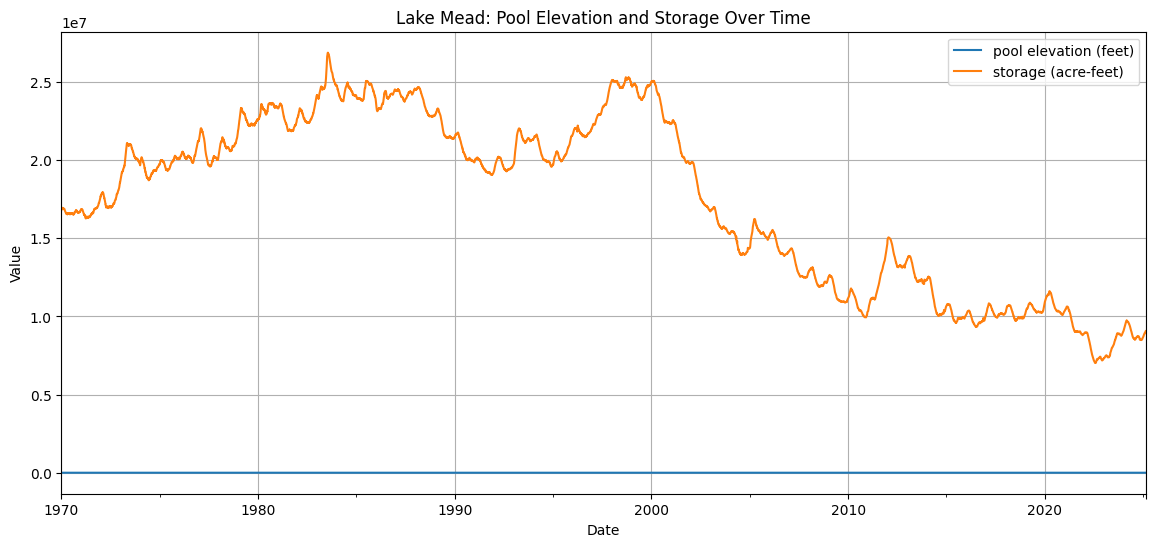

In [6]:
df_corrected[['pool elevation (feet)', 'storage (acre-feet)']].plot(figsize=(14, 6), title='Lake Mead: Pool Elevation and Storage Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [7]:
# Pool Elevation
elevation = df_corrected['pool elevation (feet)']
train_elev = elevation[:int(0.8 * len(elevation))]
test_elev = elevation[int(0.8 * len(elevation)):]

# Storage
storage = df_corrected['storage (acre-feet)']
train_stor = storage[:int(0.8 * len(storage))]
test_stor = storage[int(0.8 * len(storage)):]

In [8]:
# ARIMA model for Pool Elevation
model_elev = ARIMA(train_elev, order=(5, 1, 2))
fit_elev = model_elev.fit()
forecast_elev = fit_elev.forecast(steps=len(test_elev))

# ARIMA model for Storage Volume
model_stor = ARIMA(train_stor, order=(2, 1, 1))
fit_stor = model_stor.fit()
forecast_stor = fit_stor.forecast(steps=len(test_stor))

C:\Users\cynre\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\cynre\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\cynre\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\cynre\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cynre

In [9]:
rmse_elev = np.sqrt(mean_squared_error(test_elev, forecast_elev))
rmse_stor = np.sqrt(mean_squared_error(test_stor, forecast_stor))

print(f"Pool Elevation RMSE: {rmse_elev:.2f} feet")
print(f"Storage Volume RMSE: {rmse_stor:.2f} acre-feet")

r2_elev = r2_score(test_elev, forecast_elev)
r2_stor = r2_score(test_stor, forecast_stor)

print(f"R2 Score Pool Elevation: {r2_elev:.2f}")
print(f"R2 Score Storage Volume: {r2_stor:.2f}")

Pool Elevation RMSE: 37.43 feet
Storage Volume RMSE: 3044067.66 acre-feet
R2 Score Pool Elevation: -6.69
R2 Score Storage Volume: -7.05


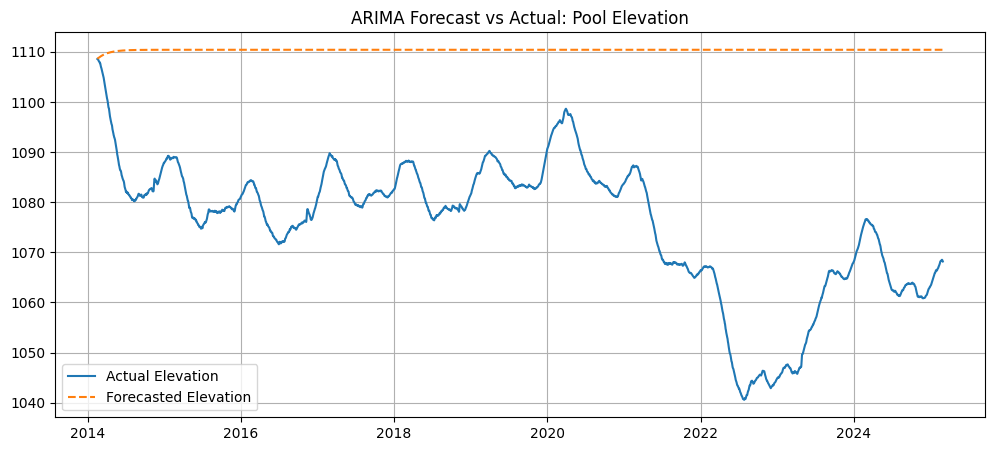

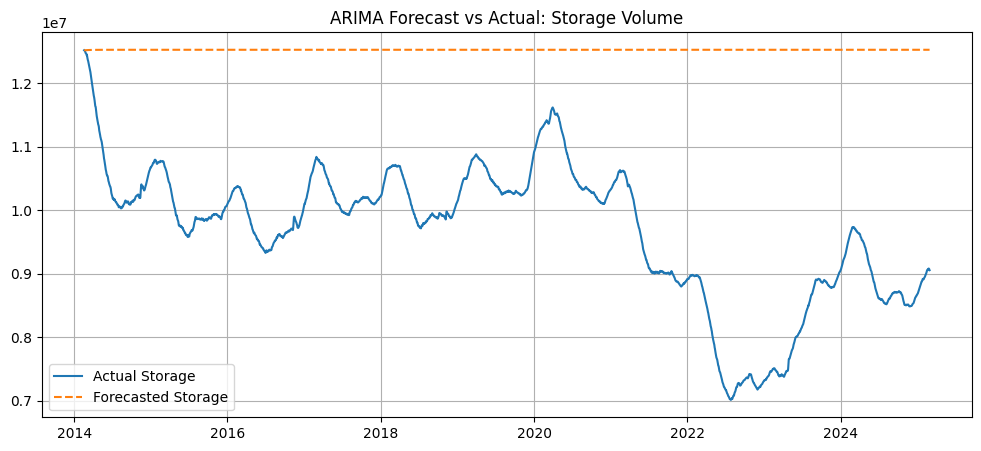

In [10]:
# Plot for Pool Elevation
plt.figure(figsize=(12, 5))
plt.plot(test_elev.index, test_elev, label='Actual Elevation')
plt.plot(test_elev.index, forecast_elev, label='Forecasted Elevation', linestyle='--')
plt.title('ARIMA Forecast vs Actual: Pool Elevation')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Storage Volume
plt.figure(figsize=(12, 5))
plt.plot(test_stor.index, test_stor, label='Actual Storage')
plt.plot(test_stor.index, forecast_stor, label='Forecasted Storage', linestyle='--')
plt.title('ARIMA Forecast vs Actual: Storage Volume')
plt.legend()
plt.grid(True)
plt.show()